In [192]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
import os 

In [344]:
def Cost(tht1, tht2):
    n = X.shape[0]
    cost = 0.0
    for i in range(n):
        cost += (y[i] - tht1*X[i][0] - tht2*X[i][1])**2 
    return cost/n

def grad(tht):
    n = X.shape[0]
    gC = -2*(y - X@tht).T@X    
    return gC/n

def GradientDescent(grad, tht, alpha, max_iter = float('inf'), epsilon = 1e-5):    
    t = tht
    t_seq = [t]

    stop = False
    iter = 0
    while not stop:
        step = -alpha*grad(t)
        t = t + step
        t_seq.append(t)
        iter = iter + 1
        if np.linalg.norm(step) < epsilon or iter == max_iter:
            stop = True        
    t_seq = np.array(t_seq)
    return t_seq

In [485]:
#Description from Kaggle of the Boston dataset (506 observations)
# [0] - CRIM per capita crime rate by town 
# [1] - ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
# [2] - INDUS proportion of non-retail business acres per town 
# [3]- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
# [4]- NOX nitric oxides concentration (parts per 10 million) 
# [5]- RM average number of rooms per dwelling 
# [6]- AGE proportion of owner-occupied units built prior to 1940 
# [7]- DIS weighted distances to five Boston employment centres 
# [8]- RAD index of accessibility to radial highways 
# [9]- TAX full-value property-tax rate per $10,000 
# [10]- PTRATIO pupil-teacher ratio by town 
# [11]- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
# [12]- LSTAT % lower status of the population 
# [13]- MEDV Median value of owner-occupied homes in $1000's

n_samples=506
X =  np.zeros((n_samples,2))
y = np.zeros(n_samples)

with open('housing.csv') as csvfile:
    reader = csv.reader(csvfile)
    i = 0
    for row in reader:
        lst = [float(j) for j in ', '.join(row).split()]
        rm_var = lst[5] 
        medv_var = lst[13]
        if medv_var < 50.0: #Truncation value
            X[i, 0] = 1
            X[i, 1] = rm_var
            y[i] = medv_var
            i = i +1

n_samples = i
X = X[0:n_samples,:]
y = y[0:n_samples]
print(f"{n_samples=}")

n_samples=490


In [486]:
theta_explicit = np.matmul(np.linalg.pinv(X),y)
print(f"beta0 = {theta_explicit[0]}, beta1 = {theta_explicit[1]}")

beta0 = -30.005120145375855, beta1 = 8.268557322426984


In [487]:
np.random.seed(0)
x_data = np.random.normal(6, 2.5, n_samples)
X[:,1] = x_data
y = theta_explicit[0] + theta_explicit[1]*x_data + np.random.normal(0,3,n_samples)

In [488]:
theta_explicit = np.matmul(np.linalg.pinv(X),y)
print(f"beta0 = {theta_explicit[0]}, beta1 = {theta_explicit[1]}")

beta0 = -30.448388600049572, beta1 = 8.310100644523807


In [489]:
# n_samples = 5
# X = np.ones((n_samples,2))
# # x_data = [1.1,2.3,2.8,4.02,5.3]
# y_data = [3.9,5.15,6.1,9.98,8.03]
# X[:,1] = x_data
# y = y_data

In [490]:
theta_explicit = np.matmul(np.linalg.pinv(X),y)
print(f"beta0 = {theta_explicit[0]}, beta1 = {theta_explicit[1]}")

beta0 = -30.448388600049572, beta1 = 8.310100644523807


In [491]:
mu_x = np.mean(X,axis=0)[1]
sig_x = np.std(X,axis=0)[1]
(mu_x,sig_x)

(5.928320085963393, 2.4871677759130955)

In [492]:
mu_y = np.mean(y)
sig_y = np.std(y)
(mu_y, sig_y)

(18.816547967258238, 20.88095757738944)

In [493]:
# #Standardize X and Y
# X[:,1] = (X[:,1]-mu_x)/sig_x
# y = (y - mu_y)/sig_y

In [494]:
lambda_max = abs(np.linalg.eigvals(np.matmul(X,X.T)))[0] 
print(f"{lambda_max=}")
alpha_bound = n_samples/lambda_max
print(f"{alpha_bound=}")
print(f"{theta_explicit=}")

lambda_max=20670.326800608345
alpha_bound=0.02370547910183882
theta_explicit=array([-30.4483886 ,   8.31010064])


$$
\frac{y-\mu_y}{\sigma_y} = \beta_0 + \beta_1 \frac{x-\mu_x}{\sigma_x} = \beta_0 -\frac{\beta_1 \mu_x}{\sigma_x}+ \frac{\beta_1}{\sigma_x}x 
$$

$$
y = \sigma_y\beta_0 -\frac{\beta_1 \sigma_y \mu_x}{\sigma_x} + \mu_y  + \frac{\sigma_y \beta_1}{\sigma_x}x
$$

In [533]:
490/20670.33ון

0.02370547543266121

In [495]:
# unshifted_beta_0 = sig_y*gd_min[0]  -gd_min[1]*sig_y*mu_x/sig_x + mu_y
# unshifted_beta_1 = sig_y*gd_min[1]/sig_x
# unshifted_beta_0, unshifted_beta_1

In [527]:
alpha_A = 0.01# learning rate
t_init = np.array([0,0]) # initial point
t_seq_gd_A = GradientDescent(grad, t_init, alpha_A,max_iter=10e4)
gd_min = t_seq_gd_A[-1,:]
print(f"{gd_min=}")
print(len(t_seq_gd_A))

gd_min=array([-30.44502456,   8.3096164 ])
3109


In [528]:
alpha_B = 0.0235# learning rate
t_init = np.array([0,0]) # initial point
t_seq_gd_B = GradientDescent(grad, t_init, alpha_B,max_iter=10e4)
gd_min = t_seq_gd_B[-1,:]
print(f"{gd_min=}")
print(len(t_seq_gd_B))

gd_min=array([-30.44697218,   8.30989676])
1446


In [529]:
alpha_C = 0.024# learning rate
t_init = np.array([0,0]) # initial point
t_seq_gd_C = GradientDescent(grad, t_init, alpha_C,max_iter=10e4)
gd_min = t_seq_gd_C[-1,:]
print(f"{gd_min=}")
print(len(t_seq_gd_C))

<ipython-input-344-8a4d4a9d9005>:10: RuntimeWarning: invalid value encountered in matmul
  gC = -2*(y - X@tht).T@X
<ipython-input-344-8a4d4a9d9005>:21: RuntimeWarning: invalid value encountered in add
  t = t + step


gd_min=array([nan, nan])
100001


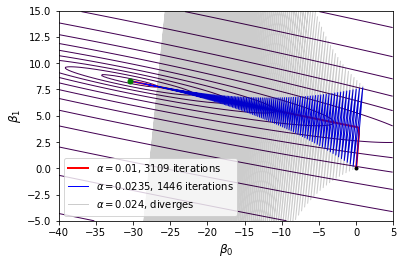

<Figure size 432x288 with 0 Axes>

In [531]:
t1_min = -40
t1_max = 5
t2_min = -5
t2_max = 15
t1_range = np.arange(t1_min, t1_max, 0.1)
t2_range = np.arange(t2_min, t2_max, 0.1)
t1_arr, t2_arr = np.meshgrid(t1_range, t2_range)

Z = Cost(t1_arr, t2_arr)

fig, ax = plt.subplots()  
ax.contour(t1_range, t2_range, Z, linewidths=1, levels=np.exp(np.arange(0, 20, 0.6)))#, cmap='Blues')
ax.plot(t_seq_gd_A[:, 0], t_seq_gd_A[:, 1], '-or', label=r'$\alpha = 0.01$' + f', {len(t_seq_gd_A)} iterations', alpha=1, linewidth=2, markersize=0,color='red')
ax.plot(t_seq_gd_B[:, 0], t_seq_gd_B[:, 1], '-or', label=r'$\alpha = 0.0235$' + f', {len(t_seq_gd_B)} iterations', alpha=1, linewidth=1, markersize=0,color='blue')
ax.plot(t_seq_gd_C[:300, 0], t_seq_gd_C[:300, 1], '-or', label=r'$\alpha = 0.024$' + ', diverges', alpha=0.2, linewidth=1, markersize=0,color='black')
ax.plot([0],[0], 'og', markersize=3,color='black')
ax.plot([theta_explicit[0]], [theta_explicit[1]], 'og', markersize=5)

plt.xlabel(r'$\beta_0$', fontsize=12)
plt.ylabel(r'$\beta_1$', fontsize=12)
plt.legend(loc='lower left')
plt.xlim(t1_min,t1_max)
plt.ylim(t2_min,t2_max)
plt.subplots_adjust(bottom=0.15)

fig.savefig("learning_rate_linear.pdf")

plt.show()
fig = plt.figure();

In [307]:
# bx = plt.axes(projection='3d')
# bx.plot_surface(t1_arr, t2_arr, Z, cmap='Blues', edgecolor='none')
# bx.set_xlabel(r'$w_1$', fontsize=20)
# bx.set_ylabel(r'$w_2$', fontsize=20)
# bx.set_zlabel(r'$C(\theta)$', fontsize=20) 
# plt.show()